## Завдання 1
У цьому завданні вам потрібно завантажити ось цей датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

## Завдання 2
Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоримтом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

### Кластеризація двовимірного датасету data_2d.csv:

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [103]:
# Завантаження датасету
data_2d = pd.read_csv('/content/drive/MyDrive/Data_science/hw_06/data/data_2d.csv', header=None)

In [104]:
X = data_2d.values

In [105]:
# Стандартизація даних
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [106]:
# Визначення оптимальної кількості кластерів за допомогою ліктевого методу
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=42)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)

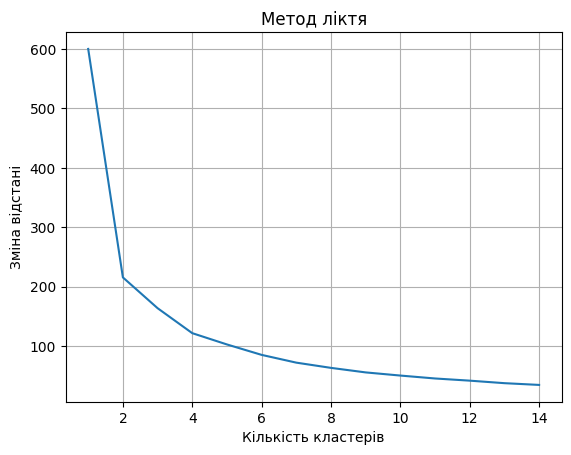

In [107]:
# Побудова графіка
plt.plot(range(1, 15), wcss)
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Зміна відстані')
plt.grid()
plt.show()

In [108]:
# Оптимальна кількість кластерів
optimal_clusters = 2

In [109]:
# Кластеризація з оптимальною кількістю кластерів
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=500, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_std)

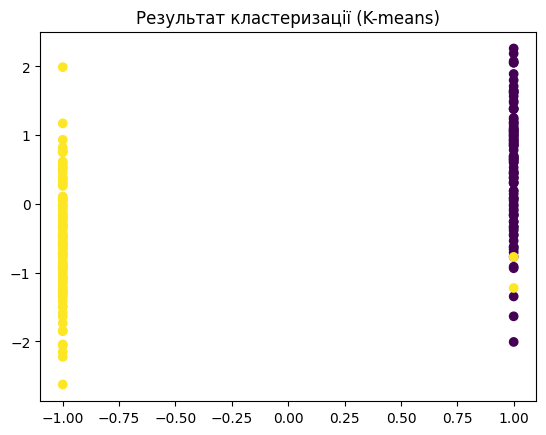

In [110]:
# Вивід результатів
plt.scatter(X_std[:, 0], X_std[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Результат кластеризації (K-means)')
plt.show()

### Кластеризація датасету mnist.csv:

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [112]:
# Завантаження датасету mnist.csv
mnist_data = pd.read_csv('/content/drive/MyDrive/Data_science/hw_06/data/mnist.csv', header=None)

In [113]:
# Вибір ознак для кластеризації
X = mnist_data.values

In [114]:
# Стандартизація даних
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [115]:
# Визначення оптимальної кількості кластерів за допомогою ліктевого методу
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)

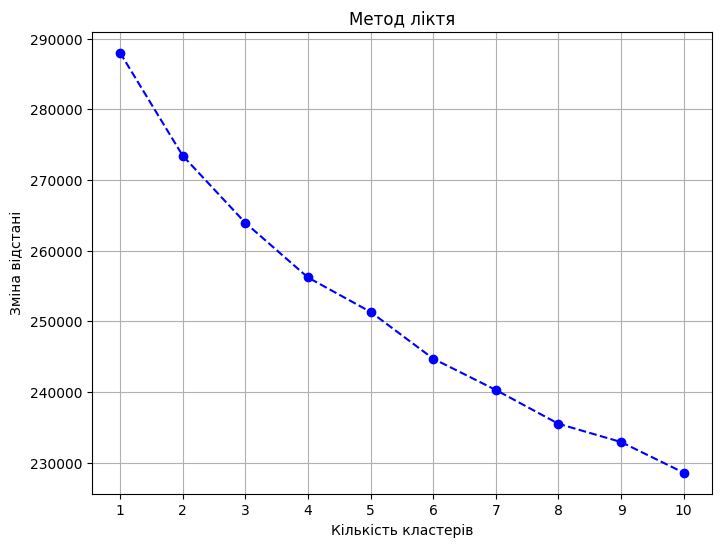

In [130]:
# Побудова графіка
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Зміна відстані')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [117]:
# Оптимальна кількість кластерів
optimal_clusters = 4

In [118]:
# Кластеризація з оптимальною кількістю кластерів
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_std)

In [119]:
# Зменшення розмірності даних до 2D за допомогою PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

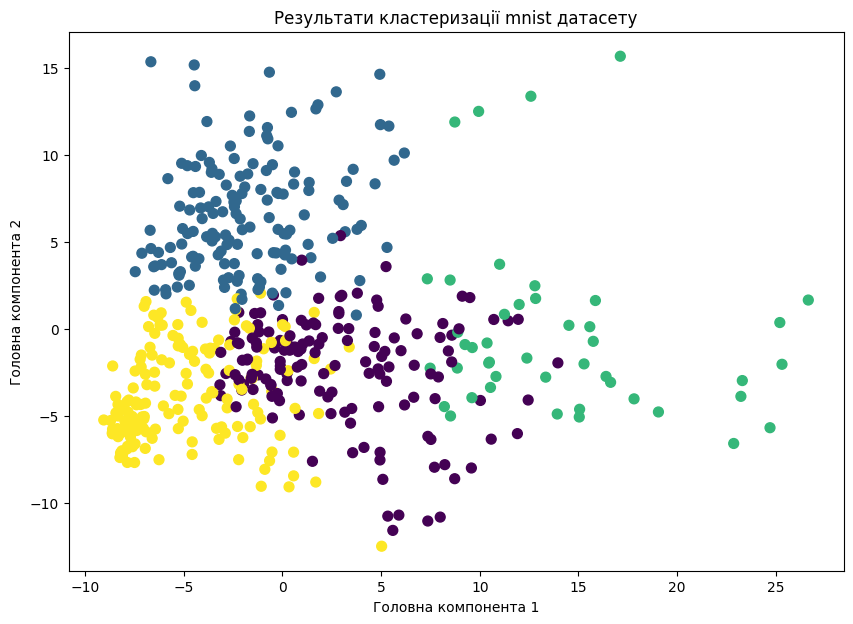

In [126]:
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('Результати кластеризації mnist датасету')
plt.xlabel('Головна компонента 1')
plt.ylabel('Головна компонента 2')
plt.show()